In [1]:
import py_wake
import numpy as np
import matplotlib.pyplot as plt
import os
from py_wake.deficit_models import BastankhahGaussianDeficit

In [2]:
from py_wake.wind_turbines import WindTurbine, WindTurbines
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
from py_wake.site._site import UniformSite
from py_wake.wind_farm_models import PropagateDownwind, All2AllIterative
from py_wake.flow_map import XYGrid

In [3]:
diameter = 240
hub_height = 150
_u = [0, 3, 12, 25, 30]
_ct = [0, 8/9, 8/9, 0.3, 0]
_power = [0, 0, 2000, 2000, 0]
wind_speed = 8.5

wt = WindTurbine(
    name='MyWT',
    diameter=240,
    hub_height=150,
    powerCtFunction=PowerCtTabular(_u, _power, 'kW', _ct)
)

site = UniformSite(ti = 0.12, ws = wind_speed * 1.03)

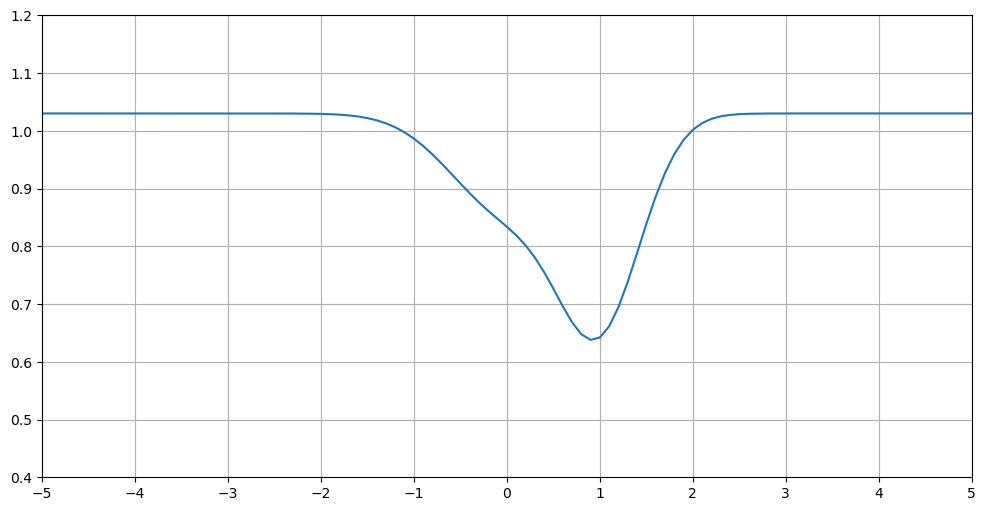

In [4]:
grid = XYGrid(
    x=10*diameter,
    y=np.linspace(-7.5*diameter, 7.5*diameter, 151)
)

wf = All2AllIterative(
    site = site,
    windTurbines = wt,
    wake_deficitModel=BastankhahGaussianDeficit(use_effective_ws=True),
)

plt.figure(figsize=(12,6))

fm = wf(x=[0, 5*diameter], y=[0, 1*diameter], wd=270).flow_map(grid)

plt.plot(
    fm.Y / diameter,
    fm.WS_eff.squeeze() / wind_speed
)

plt.ylim(0.4,1.2)
plt.xlim(-5,5)
plt.xticks(np.linspace(-5, 5, 11))
plt.grid()
